## Exercice séance 4

Tous les exercices sont sur les données du tableau de presse tableau.csv (dans data.zip).

Ces données représentent tous les articles de presse nationale française qui mentionnent `suisse` sur le dernier mois.

La question est : comment parle-t-on de la Suisse...

## Exercice 1

- Quelle est la distribution des journaux du dataset en pourcentages
- Renommer la catégotie `Aujourd'hui en France                Edition Principale` pour la rendre plus courte

In [1]:
# Commencer par importer pandas
import pandas as pd

# Et lire les données
df = pd.read_csv("tableau.csv")

In [2]:
#Regarder le dataframe
df.head()

,Date_raw,Titre_raw,Journal_raw,Contenu_raw,Auteur_raw,Date_mod,Titre_mod,Contenu_mod,Journal_mod
0,"\nPlanète, jeudi 11 avril 2024 754 mot...",\n\nLa classe politique suisse divisée par la...,\n Le Monde,\n\nGenève - correspondance - La condamnation ...,NaN,2024-04-11,La classe politique suisse divisée par la déc...,Genève - correspondance - La condamnation de l...,Le Monde
1,"\nÉco&Transition, mercredi 10 avril 20...",\n\nLa CEDH condamne la Suisse pour inaction ...,"\n La Croix, no. 42892",\n\nC’est une décision qui fera date dans le c...,NaN,2024-04-10,La CEDH condamne la Suisse pour inaction clim...,C’est une décision qui fera date dans le comba...,La Croix
2,"\nPlanète, jeudi 11 avril 2024 1173 mo...",\n\nInaction climatique : une condamnation his...,\n Le Monde,\n\nStrasbourg - envoyée spéciale - Il fallait...,NaN,2024-04-11,Inaction climatique : une condamnation histori...,Strasbourg - envoyée spéciale - Il fallait ent...,Le Monde
3,"\n_Faits divers, samedi 30 mars 2024 7...",\n\nRazzia sur les vélos électriques aux front...,\n Aujourd'hui en France ...,\n\nMartin Antoine Correspondantà Strasbourg (...,NaN,2024-03-30,Razzia sur les vélos électriques aux frontière...,Martin Antoine Correspondantà Strasbourg (bas-...,Aujourd'hui en France Edition P...
4,"\nEconomie & Entreprise, samedi 20 avr...","\n\nEntre malbouffe et scandales, le suisse N...",\n Le Monde,\n\nLausanne (Suisse) - envoyé spécial - La gr...,NaN,2024-04-20,"Entre malbouffe et scandales, le suisse Nestl...",Lausanne (Suisse) - envoyé spécial - La grand-...,Le Monde


In [3]:
#Regarder les noms des colonnes
df.columns

Index(['Date_raw', 'Titre_raw', 'Journal_raw', 'Contenu_raw', 'Auteur_raw',
       'Date_mod', 'Titre_mod', 'Contenu_mod', 'Journal_mod'],
      dtype='object')

#### 1.1 Distribution

In [4]:
# Je veux donc le nombre d'articles par journal qui correspond à la colonne "Journal_mod"
df["Journal_mod"].value_counts()

Journal_mod
Le Figaro                                                  61
Le Monde                                                   59
Aujourd'hui en France                Edition Principale    57
Libération                                                 34
La Croix                                                   25
l'Humanité                                                 15
L'Express                                                  13
Le Point                                                    9
Valeurs Actuelles                                           6
Name: count, dtype: int64

In [5]:
# En fait je veux les fréquences :
# donc normaliser les valeurs : normalize=True
df["Journal_mod"].value_counts(normalize=True)

Journal_mod
Le Figaro                                                  0.218638
Le Monde                                                   0.211470
Aujourd'hui en France                Edition Principale    0.204301
Libération                                                 0.121864
La Croix                                                   0.089606
l'Humanité                                                 0.053763
L'Express                                                  0.046595
Le Point                                                   0.032258
Valeurs Actuelles                                          0.021505
Name: proportion, dtype: float64

In [6]:
# Je les veux même en pourcentage ces fréquences : *100
df["Journal_mod"].value_counts(normalize=True)*100

Journal_mod
Le Figaro                                                  21.863799
Le Monde                                                   21.146953
Aujourd'hui en France                Edition Principale    20.430108
Libération                                                 12.186380
La Croix                                                    8.960573
l'Humanité                                                  5.376344
L'Express                                                   4.659498
Le Point                                                    3.225806
Valeurs Actuelles                                           2.150538
Name: proportion, dtype: float64

In [7]:
# Et je peux arrondir :
round(100*df["Journal_mod"].value_counts(normalize=True),2)

Journal_mod
Le Figaro                                                  21.86
Le Monde                                                   21.15
Aujourd'hui en France                Edition Principale    20.43
Libération                                                 12.19
La Croix                                                    8.96
l'Humanité                                                  5.38
L'Express                                                   4.66
Le Point                                                    3.23
Valeurs Actuelles                                           2.15
Name: proportion, dtype: float64

#### 1.2 Recodage

In [8]:
# Recoder en utilisant replace
df["Journal_mod"].replace({"Aujourd'hui en France                Edition Principale" : "Aujourd'hui en France"},
                          inplace=True # je peux utiliser inplace=True pour modifier directement le dataframe
                          )

# ici j'utilise inplace=True pour que la modification soit faite directement
# c'est une alternative à ça :
#df["Journal_mod"] = df["Journal_mod"].replace({"Aujourd'hui en France                Edition Principale":"Aujourd'hui en France"})

In [9]:
# Vérification
df["Journal_mod"].value_counts(normalize=True)*100

Journal_mod
Le Figaro                21.863799
Le Monde                 21.146953
Aujourd'hui en France    20.430108
Libération               12.186380
La Croix                  8.960573
l'Humanité                5.376344
L'Express                 4.659498
Le Point                  3.225806
Valeurs Actuelles         2.150538
Name: proportion, dtype: float64

## Exercice 2

- Ajouter une colonne qui correspond au nombre de mots de chaque article
- Calculer le nombre de mots moyens et la variance par journal
- Quel est le journal qui a le plus de mots, le moins de mots ?

### 2.1 Ajout colonne "nb_mots"

In [10]:
# Créer une fonction qui calcule le nombre de mots
def nb_mots(texte):
    return len(texte.split(" "))

In [11]:
df["nb_mots"] = df["Contenu_mod"].apply(nb_mots)

In [12]:
df["nb_mots"]

0       704
1       773
2      1137
3       706
4       904
       ... 
274      71
275     527
276    1302
277    1202
278    1252
Name: nb_mots, Length: 279, dtype: int64

### 2.2 Calculer le nombre de mots moyens et la variance par journal

In [13]:
# je veux donc grouper par journal
# puis calculer la moyenne et la variance du nombre de mots
df.groupby("Journal_mod")["nb_mots"].mean()

Journal_mod
Aujourd'hui en France     323.192982
L'Express                1116.000000
La Croix                  770.200000
Le Figaro                 968.590164
Le Monde                 1041.542373
Le Point                  927.666667
Libération               1056.617647
Valeurs Actuelles         486.333333
l'Humanité                711.000000
Name: nb_mots, dtype: float64

In [14]:
# Pour la variance
df.groupby("Journal_mod")["nb_mots"].var()

Journal_mod
Aujourd'hui en France    1.449109e+05
L'Express                4.149342e+05
La Croix                 2.158629e+06
Le Figaro                1.725118e+05
Le Monde                 4.228775e+05
Le Point                 3.267018e+05
Libération               4.300061e+05
Valeurs Actuelles        2.310471e+05
l'Humanité               2.725239e+05
Name: nb_mots, dtype: float64

In [15]:
# Pour les deux en même temps avec .agg()
df.groupby("Journal_mod")["nb_mots"].agg(["mean", "var"])

,mean,var
Journal_mod,,
Aujourd'hui en France,323.192982,1.449109e+05
L'Express,1116.000000,4.149342e+05
La Croix,770.200000,2.158629e+06
Le Figaro,968.590164,1.725118e+05
Le Monde,1041.542373,4.228775e+05
Le Point,927.666667,3.267018e+05
Libération,1056.617647,4.300061e+05
Valeurs Actuelles,486.333333,2.310471e+05
l'Humanité,711.000000,2.725239e+05


### 2.3 Quel est le journal qui a le plus de mots, le moins de mots ?

In [16]:
df[df["nb_mots"] == df["nb_mots"].max()]

,Date_raw,Titre_raw,Journal_raw,Contenu_raw,Auteur_raw,Date_mod,Titre_mod,Contenu_mod,Journal_mod,nb_mots
84,"\nDossier, samedi 6 avril 2024 7842 mo...",\n\nL’énigme Agathe Habyarimana \n ...,"\n La Croix, no. 227","\n\nardin du palais présidentiel de Kigali, le...",NaN,2024-04-06,L’énigme Agathe Habyarimana,"ardin du palais présidentiel de Kigali, le 21 ...",La Croix,7596


In [17]:
df[df["nb_mots"] == df["nb_mots"].min()]

,Date_raw,Titre_raw,Journal_raw,Contenu_raw,Auteur_raw,Date_mod,Titre_mod,Contenu_mod,Journal_mod,nb_mots
235,"\n samedi 6 avril 2024 24 mots, p. 1","\nEnquête\n\nA Davos, le poison de l’antisémit...",\n Le Monde,"\n\nDans la station suisse,les tensions se mul...",NaN,2024-04-06,"Enquête\n\nA Davos, le poison de l’antisémitisme","Dans la station suisse,les tensions se multipl...",Le Monde,13


In [18]:
df.loc[df["nb_mots"].idxmax()]

Date_raw       \nDossier,         samedi 6 avril 2024 7842 mo...
Titre_raw      \n\nL’énigme Agathe Habyarimana            \n ...
Journal_raw      \n        La Croix, no. 227                    
Contenu_raw    \n\nardin du palais présidentiel de Kigali, le...
Auteur_raw                                                   NaN
Date_mod                                              2024-04-06
Titre_mod                            L’énigme Agathe Habyarimana
Contenu_mod    ardin du palais présidentiel de Kigali, le 21 ...
Journal_mod                                             La Croix
nb_mots                                                     7596
Name: 84, dtype: object

## Exercice 3

- Ajouter une colonne qui correspond au nombre de fois où le mot `Suisse` est utilisé par article
- Ajouter une colonne qui contient la densité du mot par article (occurence / nombre total de mots)
- Représenter l'histogramme de cette distribution (utiliser `kind="hist"`)

### 3.1 Colonne nb_suisse

In [19]:
# Ajouter une colonne qui correspond au nombre de fois où le mot `Suisse` est utilisé par article
df["nb_suisse"] = (df["Contenu_mod"].str.lower()).str.count("suisse | suisse|suisse.")

### 3.2 Ajouter une colonne qui contient la densité du mot par article (occurence / nombre total de mots)

In [20]:
# on a déjà ce qu'il nous faut :
# occurrence -> df["nb_suisse"]
# nb_mots -> df["nb_mots"]

# pour avoir la densité = nb_suisse / nb_mots
df["densitée"] = df["nb_suisse"] / df["nb_mots"]

### 3.3 Représenter l'histogramme de cette distribution (utiliser `kind="hist"`)

<Axes: ylabel='Frequency'>

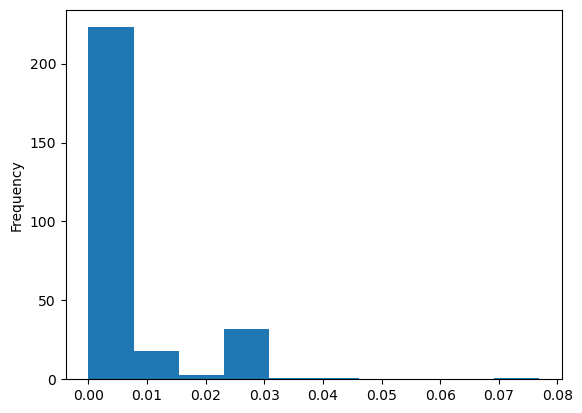

In [21]:
df["densitée"].plot(kind="hist")

## Exercice 4

- Découper la densité en quartiles avec la méthode `quantile`
- Faire le tableau croisé entre les journaux et la densité en quartiles
- Quel est l'article qui a la densité la plus forte ?

### 4.1 Découper la densité en quartiles avec la méthode `quantile`


In [22]:
df["densitée"].quantile([0.25, 0.5, 0.75])

0.25    0.001010
0.50    0.001835
0.75    0.004928
Name: densitée, dtype: float64

In [23]:
# Faire la découpe avec pd.cut en précisant les quartiles:
df["quartile"] = pd.qcut(df["densitée"], [0, 0.25, 0.5, 0.75, 1], ["Q1", "Q2", "Q3", "Q4"])

### 4.2 Faire le tableau croisé entre les journaux et la densité en quartiles


In [24]:
pd.crosstab(df["quartile"], df["Journal_mod"])

Journal_mod,Aujourd'hui en France,L'Express,La Croix,Le Figaro,Le Monde,Le Point,Libération,Valeurs Actuelles,l'Humanité
quartile,,,,,,,,,
Q1,4,7,5,21,15,4,10,1,3
Q2,7,2,2,25,20,1,11,0,3
Q3,11,3,8,13,15,4,6,3,5
Q4,35,1,10,2,9,0,7,2,4


### 4.3 Quel est l'article qui a la densité la plus forte ?

In [25]:
# idxmax ?
df.loc[df["densitée"].idxmax()]

Date_raw             \n        samedi 6 avril 2024 24 mots, p. 1
Titre_raw      \nEnquête\n\nA Davos, le poison de l’antisémit...
Journal_raw               \n        Le Monde                    
Contenu_raw    \n\nDans la station suisse,les tensions se mul...
Auteur_raw                                                   NaN
Date_mod                                              2024-04-06
Titre_mod       Enquête\n\nA Davos, le poison de l’antisémitisme
Contenu_mod    Dans la station suisse,les tensions se multipl...
Journal_mod                                             Le Monde
nb_mots                                                       13
nb_suisse                                                      1
densitée                                                0.076923
quartile                                                      Q4
Name: 235, dtype: object

## Exercice 5 (un peu plus dur)

- Construire une nouvelle colonne qui contient uniquement les phrases des articles qui mentionnent le terme `Suisse`
- Transformer chaque phrase en une liste de mots en ne garant que les mots de plus de 5 lettres
- Quels sont les mots les plus fréquents dans tous les mots des phrases retenues ?

### 5.1 Construire une nouvelle colonne qui contient uniquement les phrases des articles qui mentionnent le terme `Suisse`

On peut décomposer les étapes (ou les faire en même temps)

In [26]:
def couper_phrase(texte):
    """
    Couper un texte en phrase
    """
    phrases = texte.replace("?", ".").replace("!", ".").split(".")
    return phrases

df["phrases"] = df["Contenu_mod"].apply(couper_phrase)

def selectionner_phrase(liste_phrases):
    """
    Renvoyer uniquement les phrases contenant suisse
    """
    echantillon = []
    for phrase in liste_phrases:
        if "suisse" in phrase.lower():
            echantillon.append(phrase)
    return echantillon

# Avec compréhension de liste
def selectionner_phrase(liste_phrases):
    return [phrase for phrase in liste_phrases if "suisse" in phrase.lower()]

df["phrases_suisse"] = df["phrases"].apply(selectionner_phrase)

In [27]:
selectionner_phrase(["Ceci est un phrase", "Qui parle de la suisse"])

['Qui parle de la suisse']

### Parenthèse : les compréhensions de liste

In [28]:
ma_liste = ["La suisse", "rien", "Deux suisses", "ok"]
longueur = []
for element in ma_liste:
    longueur.append(len(element))
longueur

[9, 4, 12, 2]

In [29]:
[len(element) for element in ma_liste]

[9, 4, 12, 2]

### 5.2 Transformer chaque phrase en une liste de mots en ne gardant que les mots de plus de 5 lettres


Ecrire une fonction qui passe d'une liste de phrases à une liste de listes de mots de plus de 5 lettres

In [30]:
def decomposer_phrases(liste_phrases):
    phrases_decomposees = []
    for phrase in liste_phrases:
        phrases_decomposees.append([mot.lower() for mot in phrase.split(" ") if len(mot) >= 5])
    return phrases_decomposees

In [31]:
df["phrases_decomposees"] = df["phrases_suisse"].apply(decomposer_phrases)

In [32]:
df["phrases_decomposees"]

0      [[genève, correspondance, condamnation, suisse...
1      [[européenne, droits, l’homme, (cedh),, s’étai...
2      [[mardi, 9 avril,, européenne, droits, l’homme...
3      [[martin, antoine, correspondantà, strasbourg,...
4      [[lausanne, (suisse), envoyé, spécial, grand-m...
                             ...                        
274    [[france, arrive, onzième, position,, derrière...
275    [[revoir, après, suisse], [fâché, suisses, fâc...
276    [[principe, qu'avec, dopage, classique, détour...
277    [[déjà,, réseau, express, métropolitain, europ...
278    [[l'assurance-vie, apparaît, comme, couteau, s...
Name: phrases_decomposees, Length: 279, dtype: object

### 5.3 Quels sont les mots les plus fréquents dans tous les mots des phrases retenues ?

Utilisation d'un objet qui permer de compter des éléments

In [33]:
from collections import Counter

In [34]:
Counter(["a", "a", "b"]) + Counter(["a", "a", "b"])

Counter({'a': 4, 'b': 2})

In [35]:
def transformer_en_compteur(liste_listes):
    liste_compteurs = [Counter(liste) for liste in liste_listes]
    c = Counter()
    for compteur in liste_compteurs:
        c += compteur
    return c

c = Counter()
for compteur in list(df["phrases_decomposees"].apply(transformer_en_compteur)):
    c+=compteur
c.most_common(20)

[('suisse', 274),
 ('suisse,', 87),
 ('belgique', 36),
 ('portugal', 32),
 ('tunisie', 31),
 ('andorre', 30),
 ('dom-tom', 30),
 ('espagne', 30),
 ('grèce', 30),
 ('maroc', 30),
 ('suisses', 29),
 ('(suisse)', 24),
 ('france', 22),
 ('droits', 21),
 ('contre', 20),
 ('comme', 19),
 ('ainsi', 18),
 ('entre', 17),
 ('après', 16),
 ('européenne', 15)]

Il y a un peu de nettoyage à faire